In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stranger-things-episode-ratings/Stranger_Things_Ratings.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List available datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stranger-things-episode-ratings/Stranger_Things_Ratings.csv


In [5]:
df = pd.read_csv('/kaggle/input/stranger-things-episode-ratings/Stranger_Things_Ratings.csv')
df.head()


,index,Episode_Number,Title,Image_url,Year,Description,Genre,Runtime,Rating
0,0,1,Chapter One: The Vanishing of Will Byers,https://m.mediaamazon.com/images/M/MV5BMTUwNTE...,2016,At the U.S. Dept. of Energy an unexplained eve...,Drama | Fantasy | Horror,47 min,8.6
1,1,2,Chapter Two: The Weirdo on Maple Street,https://m.mediaamazon.com/images/M/MV5BMjA4NzA...,2016,Mike hides the mysterious girl in his house. J...,Drama | Fantasy | Horror,55 min,8.5
2,2,3,Chapter Three: Holly Jolly,https://m.mediaamazon.com/images/M/MV5BOTkyMDQ...,2016,An increasingly concerned Nancy looks for Barb...,Drama | Fantasy | Horror,51 min,8.9
3,3,4,Chapter Four: The Body,https://m.mediaamazon.com/images/M/MV5BMTkwMjU...,2016,Refusing to believe Will is dead Joyce tries ...,Drama | Fantasy | Horror,49 min,9.0
4,4,5,Chapter Five: The Flea and the Acrobat,https://m.mediaamazon.com/images/M/MV5BMjM0NjQ...,2016,Hopper breaks into the lab to find the truth a...,Drama | Fantasy | Horror,52 min,8.8


In [6]:
os.listdir('/kaggle/input/stranger-things-episode-ratings')


['Stranger_Things_Ratings.csv']

In [7]:
import pandas as pd

df = pd.read_csv('/kaggle/input/stranger-things-episode-ratings/Stranger_Things_Ratings.csv')
df.head()


,index,Episode_Number,Title,Image_url,Year,Description,Genre,Runtime,Rating
0,0,1,Chapter One: The Vanishing of Will Byers,https://m.mediaamazon.com/images/M/MV5BMTUwNTE...,2016,At the U.S. Dept. of Energy an unexplained eve...,Drama | Fantasy | Horror,47 min,8.6
1,1,2,Chapter Two: The Weirdo on Maple Street,https://m.mediaamazon.com/images/M/MV5BMjA4NzA...,2016,Mike hides the mysterious girl in his house. J...,Drama | Fantasy | Horror,55 min,8.5
2,2,3,Chapter Three: Holly Jolly,https://m.mediaamazon.com/images/M/MV5BOTkyMDQ...,2016,An increasingly concerned Nancy looks for Barb...,Drama | Fantasy | Horror,51 min,8.9
3,3,4,Chapter Four: The Body,https://m.mediaamazon.com/images/M/MV5BMTkwMjU...,2016,Refusing to believe Will is dead Joyce tries ...,Drama | Fantasy | Horror,49 min,9.0
4,4,5,Chapter Five: The Flea and the Acrobat,https://m.mediaamazon.com/images/M/MV5BMjM0NjQ...,2016,Hopper breaks into the lab to find the truth a...,Drama | Fantasy | Horror,52 min,8.8


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           25 non-null     int64  
 1   Episode_Number  25 non-null     int64  
 2    Title          25 non-null     object 
 3    Image_url      25 non-null     object 
 4    Year           25 non-null     int64  
 5    Description    25 non-null     object 
 6    Genre          25 non-null     object 
 7    Runtime        25 non-null     object 
 8    Rating         25 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.9+ KB


,index,Episode_Number,Year,Rating
count,25.000000,25.000000,25.000,25.000000
mean,12.000000,13.000000,2017.320,8.708000
std,7.359801,7.359801,1.249,0.659495
min,0.000000,1.000000,2016.000,6.100000
25%,6.000000,7.000000,2016.000,8.500000
50%,12.000000,13.000000,2017.000,8.800000
75%,18.000000,19.000000,2019.000,9.100000
max,24.000000,25.000000,2019.000,9.400000


In [10]:
df.columns



Index(['index', 'Episode_Number', ' Title', ' Image_url', ' Year',
       ' Description', ' Genre', ' Runtime', ' Rating'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()
df.columns


Index(['index', 'Episode_Number', 'Title', 'Image_url', 'Year', 'Description',
       'Genre', 'Runtime', 'Rating'],
      dtype='object')

In [12]:
df = df.drop(columns=['index', 'Image_url'])
df.head()


,Episode_Number,Title,Year,Description,Genre,Runtime,Rating
0,1,Chapter One: The Vanishing of Will Byers,2016,At the U.S. Dept. of Energy an unexplained eve...,Drama | Fantasy | Horror,47 min,8.6
1,2,Chapter Two: The Weirdo on Maple Street,2016,Mike hides the mysterious girl in his house. J...,Drama | Fantasy | Horror,55 min,8.5
2,3,Chapter Three: Holly Jolly,2016,An increasingly concerned Nancy looks for Barb...,Drama | Fantasy | Horror,51 min,8.9
3,4,Chapter Four: The Body,2016,Refusing to believe Will is dead Joyce tries ...,Drama | Fantasy | Horror,49 min,9.0
4,5,Chapter Five: The Flea and the Acrobat,2016,Hopper breaks into the lab to find the truth a...,Drama | Fantasy | Horror,52 min,8.8


In [13]:
def assign_season(ep):
    if ep <= 8:
        return 1
    elif ep <= 17:
        return 2
    else:
        return 3

df['Season'] = df['Episode_Number'].apply(assign_season)
df[['Episode_Number', 'Season']].head(10)


,Episode_Number,Season
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,2
9,10,2


In [14]:
season_avg = df.groupby('Season')['Rating'].mean()
season_avg


Season
1    8.887500
2    8.566667
3    8.687500
Name: Rating, dtype: float64

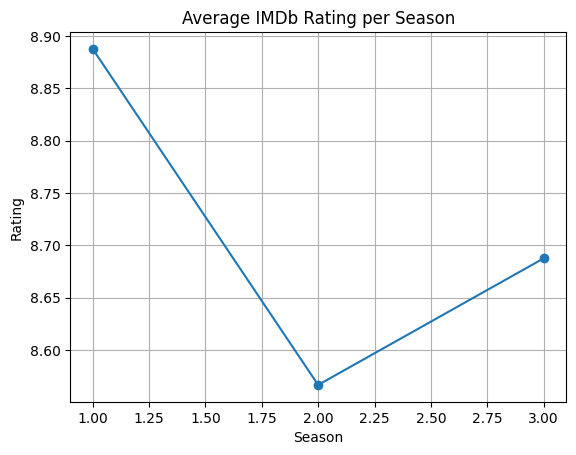

In [15]:
import matplotlib.pyplot as plt

plt.figure()
season_avg.plot(kind='line', marker='o')
plt.title('Average IMDb Rating per Season')
plt.xlabel('Season')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


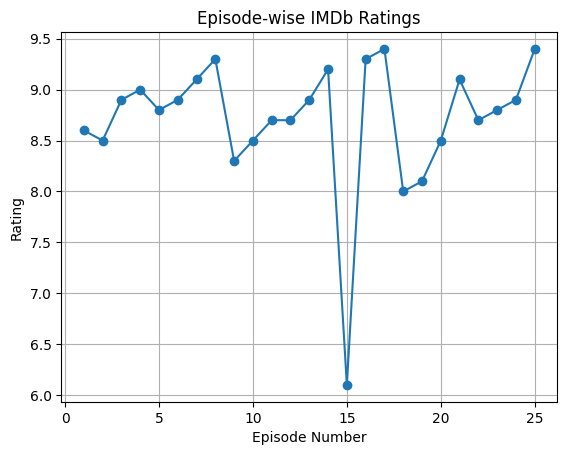

In [16]:
plt.figure()
plt.plot(df['Episode_Number'], df['Rating'], marker='o')
plt.title('Episode-wise IMDb Ratings')
plt.xlabel('Episode Number')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


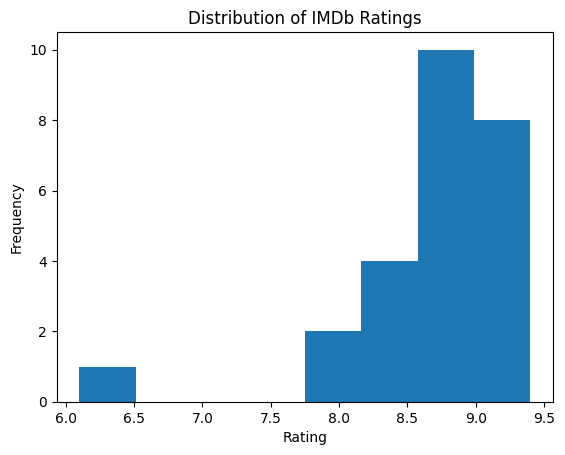

In [17]:
plt.figure()
plt.hist(df['Rating'], bins=8)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [18]:
df['Runtime_minutes'] = df['Runtime'].str.replace(' min', '').astype(int)


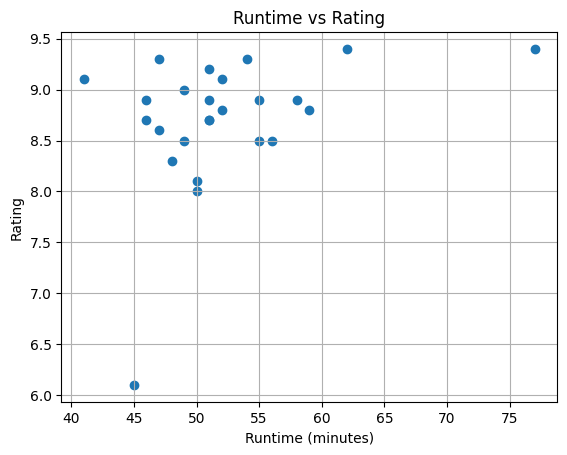

In [19]:
plt.figure()
plt.scatter(df['Runtime_minutes'], df['Rating'])
plt.title('Runtime vs Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


In [20]:
top_episodes = df.sort_values(by='Rating', ascending=False).head(3)
bottom_episodes = df.sort_values(by='Rating').head(3)

top_episodes[['Title', 'Rating']], bottom_episodes[['Title', 'Rating']]


(                                     Title  Rating
 16                  Chapter Nine: The Gate     9.4
 24  Chapter Eight: The Battle of Starcourt     9.4
 15          Chapter Eight: The Mind Flayer     9.3,
                               Title  Rating
 14   Chapter Seven: The Lost Sister     6.1
 17  Chapter One: Suzie Do You Copy?     8.0
 18       Chapter Two: The Mall Rats     8.1)